# Advanced ML Case Study 7


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

print("Dataset shape:", X.shape)
print(X.head())


Dataset shape: (442, 10)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


## Train - test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Feature Scaling

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Training

In [5]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, rmse, r2])
    
    print(f"\n{name}:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")



Linear Regression:
MAE: 42.7941
RMSE: 53.8534
R² Score: 0.4526

Random Forest:
MAE: 44.4154
RMSE: 54.5943
R² Score: 0.4374

Gradient Boosting:
MAE: 44.5930
RMSE: 53.8349
R² Score: 0.4530


## results table

In [7]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2 Score"])
print("\nModel Comparison:")
print(results_df)


Model Comparison:
               Model        MAE       RMSE  R2 Score
0  Linear Regression  42.794095  53.853446  0.452603
1      Random Forest  44.415449  54.594335  0.437438
2  Gradient Boosting  44.593020  53.834916  0.452979


## Residual plot

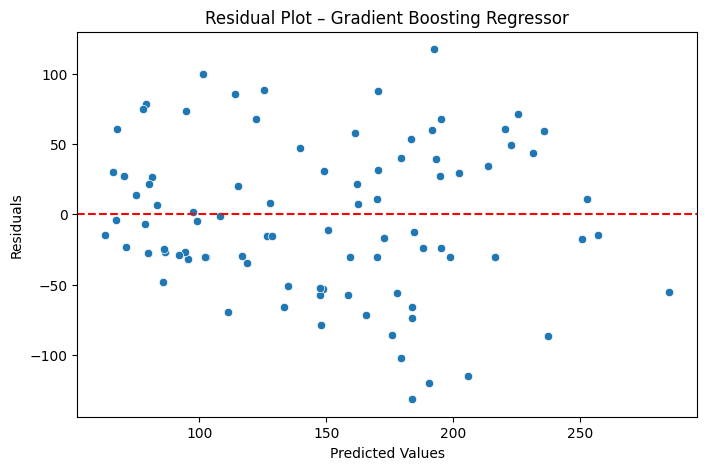

In [8]:
best_model = models["Gradient Boosting"]
y_pred_best = best_model.predict(X_test_scaled)

residuals = y_test - y_pred_best

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_best, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot – Gradient Boosting Regressor")
plt.show()


## Feature Importance


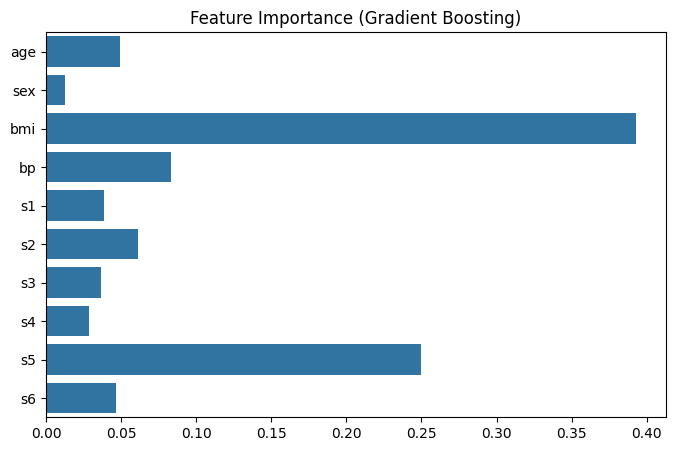

In [9]:
importances = best_model.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=diabetes.feature_names)
plt.title("Feature Importance (Gradient Boosting)")
plt.show()